<a href="https://colab.research.google.com/github/ninoc0/Layout-Parser/blob/main/orignal_layout_parser_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U layoutparser

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt # im actually not 100% sure if all of these are needed but for some reason the code wouldn't run without them

In [ ]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2' # so this basically installs everything from the detectron in a more direct way than the tutorial shows because i read through that like 3 times and it makes no sense

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-ipoa44ob/detectron2_19ac43f76b5b4bb89ccc4f5563d77c8c
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-ipoa44ob/detectron2_19ac43f76b5b4bb89ccc4f5563d77c8c
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1


In [ ]:
import cv2

In [ ]:
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

In [ ]:
!pip install layoutparser[ocr]

In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.getcwd()
!mkdir MyDrive

mkdir: cannot create directory ‘MyDrive’: File exists


In [ ]:
!mount --bind /content/drive/My\ Drive /content/MyDrive

mount: /content/MyDrive: mount point does not exist.


In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive")
sys.path.append("/content/drive/My Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 
image = cv2.imread('1.jpg')
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


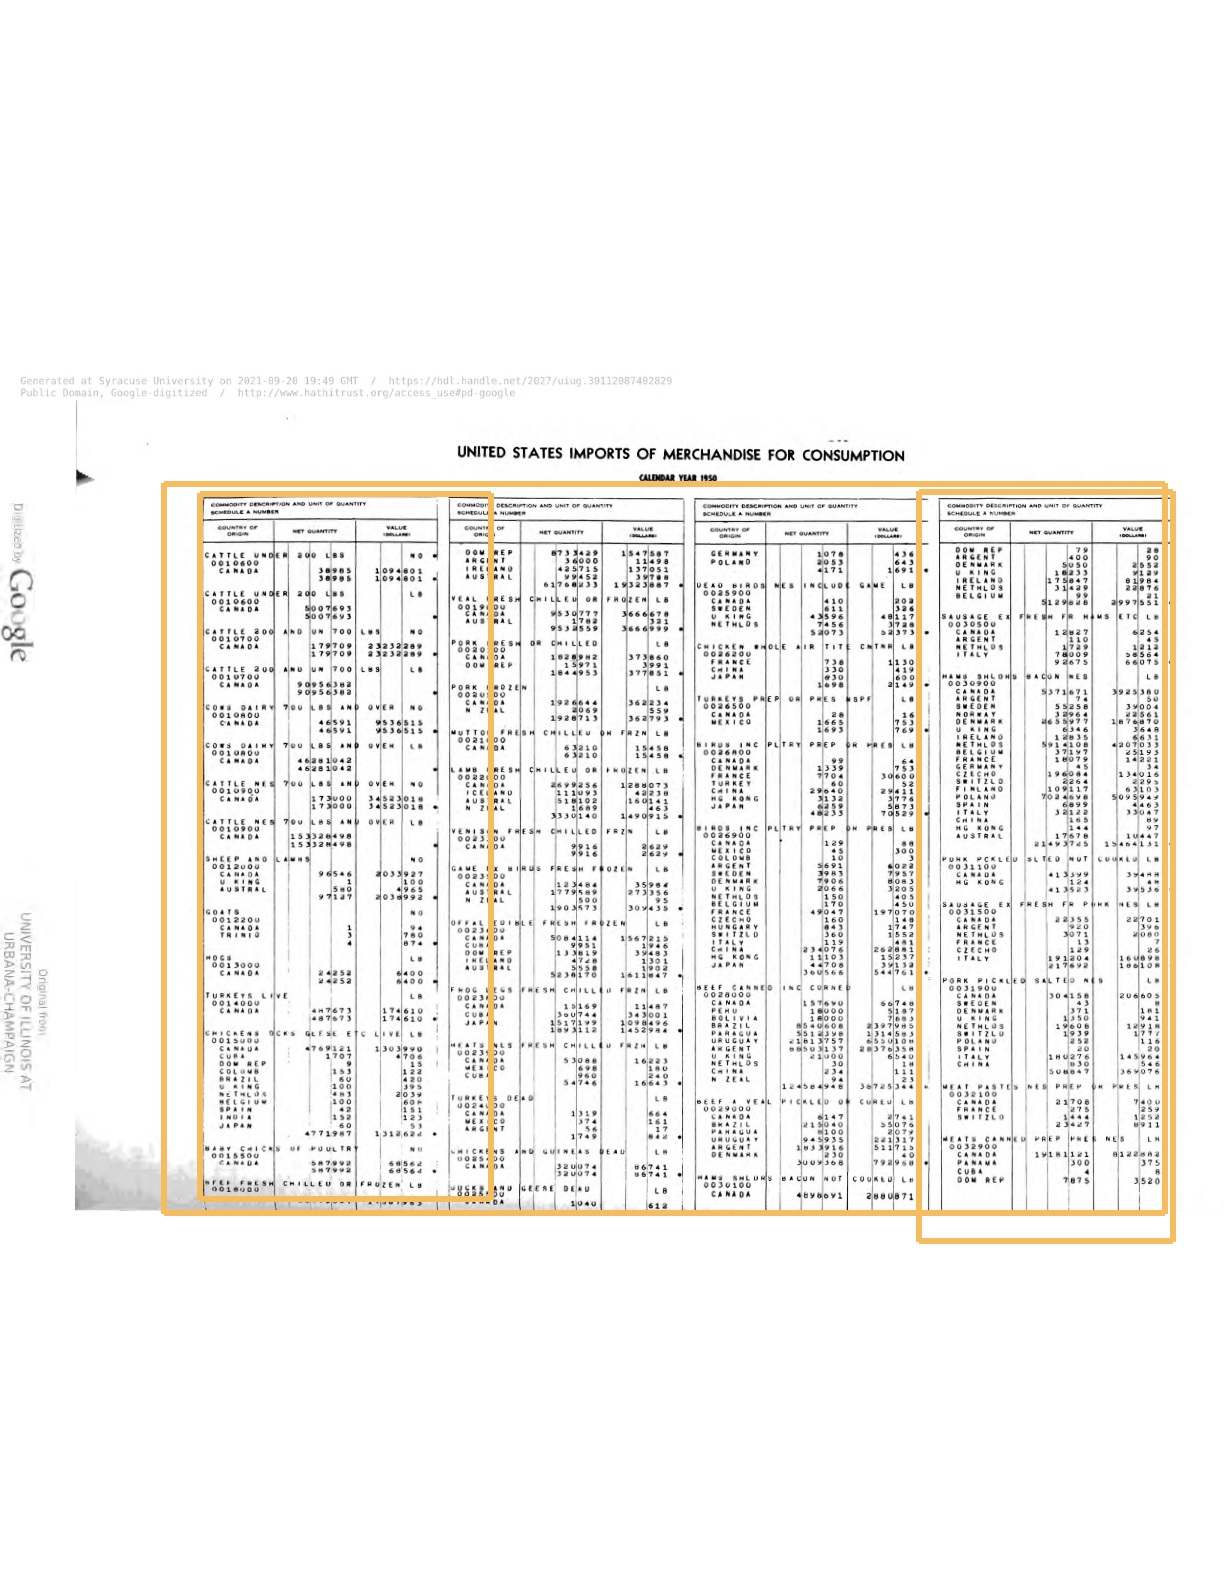

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_50_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Table"})
# this is one of the preused 
layout = model.detect(image) 
lp.draw_box(image, layout,)